In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [4]:
# Import test and train datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('hidden_test.csv')

# View first lines of training data
df_train.head(n=4)

0    1    2    3    4    5         6         7  8    9  ...         44  \
0  236  488   16  221  382   97 -4.472136  0.107472  0  132  ...  13.340874   
1  386  206  357  232    1  198  7.810250  0.763713  1  143  ...  12.484882   
2  429   49  481  111  111  146  8.602325  0.651162  1  430  ...  14.030257   
3  414  350  481  370  208  158  8.306624  0.424645  1  340  ...   2.789577   

         45         46         47         48         49         50         51  \
0  0.870542   1.962937   7.466666  11.547794   8.822916   9.046424   7.895535   
1  7.168680   2.885415  12.413973  10.260494  10.091351   9.270888   3.173994   
2  0.394970   8.160625  12.592059   8.937577   2.265191  11.255721  12.794841   
3  6.416708  10.549814  11.456437   6.468099   2.519049   0.258284   9.317696   

          52     target  
0  11.010677  20.107472  
1  13.921871  61.763713  
2  12.080951  74.651162  
3   5.383098  69.424645  

[4 rows x 54 columns]

In [5]:
df_train.describe()

0             1             2             3             4  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean     249.423944    250.236267    248.637289    249.736600    249.436178   
std      144.336393    144.022200    144.107577    144.284945    143.941581   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      125.000000    126.000000    124.000000    125.000000    125.000000   
50%      250.000000    251.000000    248.000000    250.000000    250.000000   
75%      374.000000    375.000000    374.000000    375.000000    373.000000   
max      499.000000    499.000000    499.000000    499.000000    499.000000   

                  5             6             7             8             9  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean     249.656167     -0.011402      0.498548      0.499189    249.842033   
std      144.329168      7.038171      0.288682      0.500002    144.612718   
min        0.000000     -9.949874      0.000014      0.000000      0.000000   
25%      124.000000     -7.071068      0.248932      0.000000    124.000000   
50%      250.000000      0.000000      0.497136      0.000000    250.000000   
75%      374.000000      7.000000      0.747513      1.000000    376.000000   
max      499.000000      9.949874      0.999987      1.000000    499.000000   

       ...            44            45            46            47  \
count  ...  90000.000000  90000.000000  90000.000000  90000.000000   
mean   ...      7.475155      7.523962      7.508397      7.473322   
std    ...      4.330410      4.321537      4.331761      4.335692   
min    ...      0.000019      0.000040      0.000154      0.000083   
25%    ...      3.707544      3.797002      3.760627      3.715721   
50%    ...      7.474127      7.533987      7.505259      7.459774   
75%    ...     11.216585     11.276349     11.261971     11.215637   
max    ...     14.999900     14.999528     14.999733     14.999478   

                 48            49            50            51            52  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean       7.490658      7.474578      7.509206      7.487159      7.513316   
std        4.332122      4.323035      4.326364      4.324876      4.333080   
min        0.000367      0.000014      0.000160      0.000147      0.000125   
25%        3.739358      3.715298      3.773381      3.743536      3.776322   
50%        7.494167      7.477270      7.512575      7.476564      7.506812   
75%       11.239232     11.210070     11.268156     11.234414     11.277835   
max       14.999869     14.999928     14.999948     14.999364     14.999775   

             target  
count  90000.000000  
mean      50.033981  
std       28.897243  
min        0.002634  
25%       25.091903  
50%       50.030705  
75%       75.059454  
max       99.999482  

[8 rows x 54 columns]

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

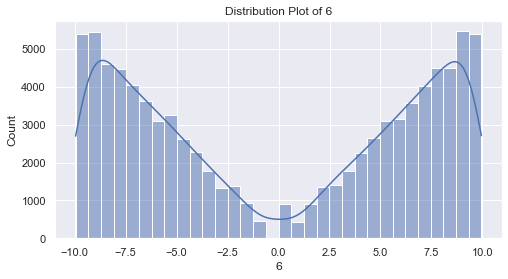

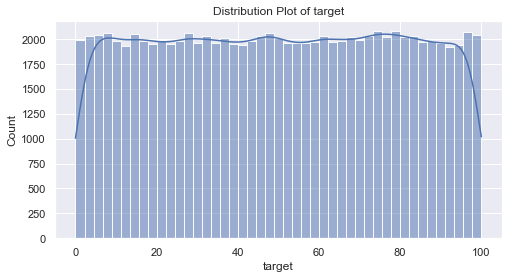

In [7]:
for i, col in enumerate(df_train.columns):
    if col not in ['6','target']:
        continue
    plt.figure(figsize=(8, 4))  # You can adjust the figure size as needed
    sns.histplot(df_train[col], kde=True)  # kde for Kernel Density Estimate
    plt.title(f'Distribution Plot of {col}')
    plt.show()
    #break

In [8]:
n = len(df_train.columns)

for i in range(n):
    for j in range(i+1, n):
        if j>i:
            if df_train.iloc[:, i].equals(df_train.iloc[:, j]):
                print(i,j)

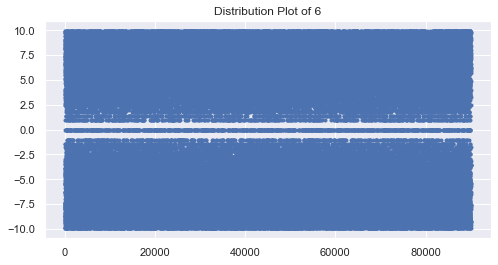

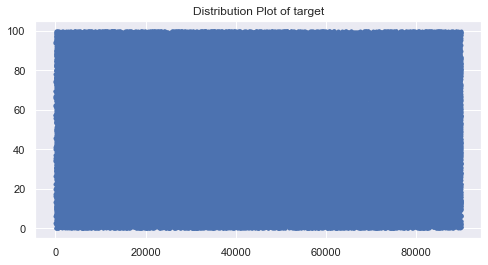

In [9]:
for i, col in enumerate(df_train.columns):
    if col not in ['6','target']:
        continue
    df_train[col].plot(style='.',  # 'o' is for circular markers
                    figsize=(8, 4),
                    linestyle='none') 
    plt.title(f'Distribution Plot of {col}')
    plt.show()
    #break

In [10]:
unique_counts = {col: df_train[col].nunique() for col in df_train.select_dtypes(include=['int64']).columns}
unique_counts


{'0': 500,
 '1': 500,
 '2': 500,
 '3': 500,
 '4': 500,
 '5': 500,
 '8': 2,
 '9': 500,
 '10': 500,
 '11': 500,
 '12': 500}

In [11]:
correlation_matrix = df_train.corr()
nrows, ncols = correlation_matrix.shape
print(nrows, ncols)


54 54


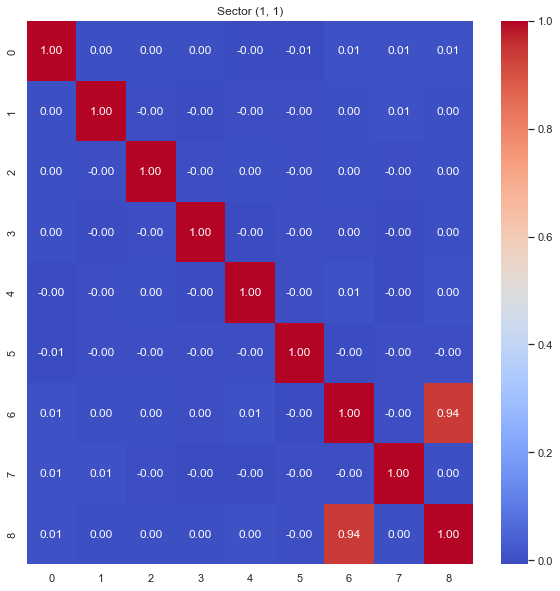

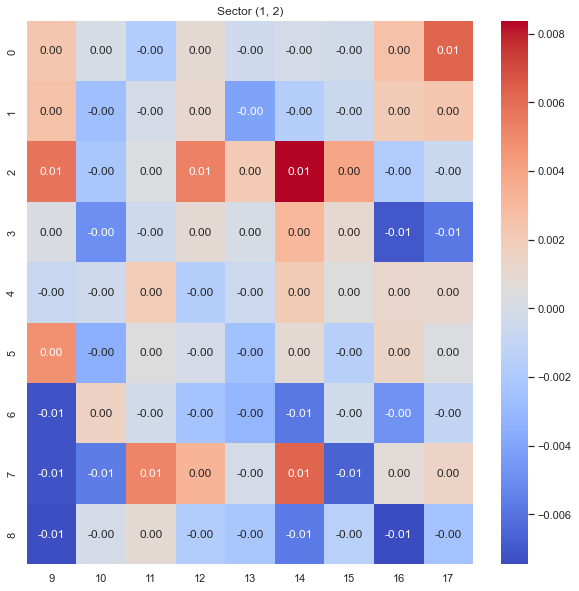

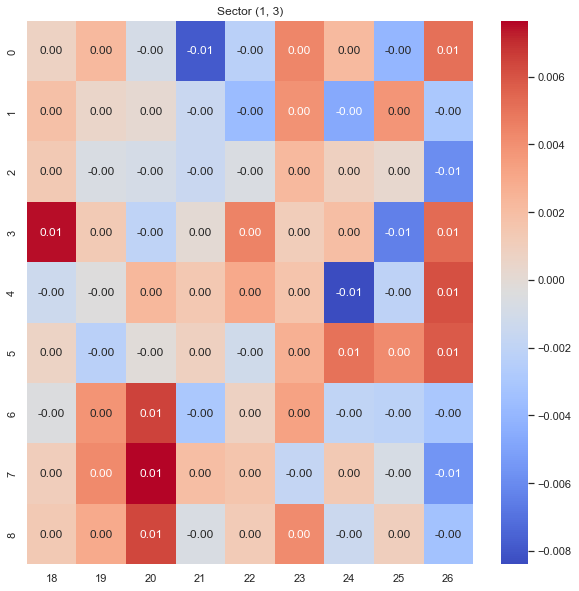

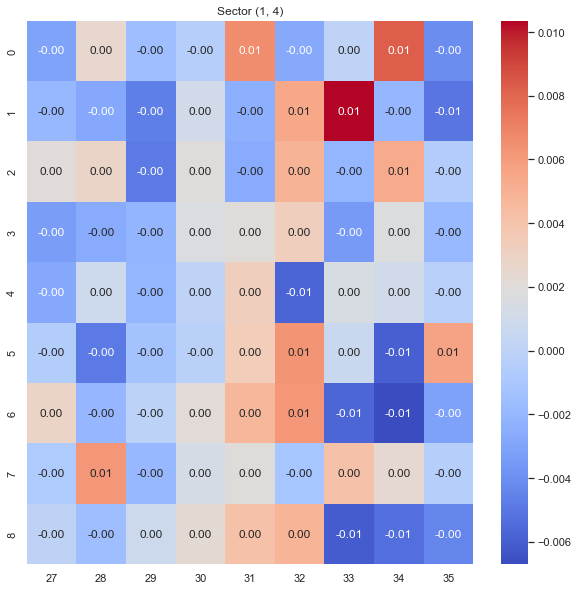

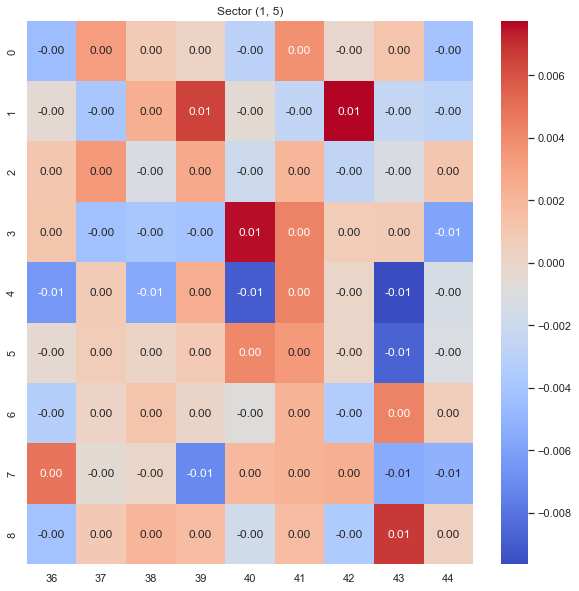

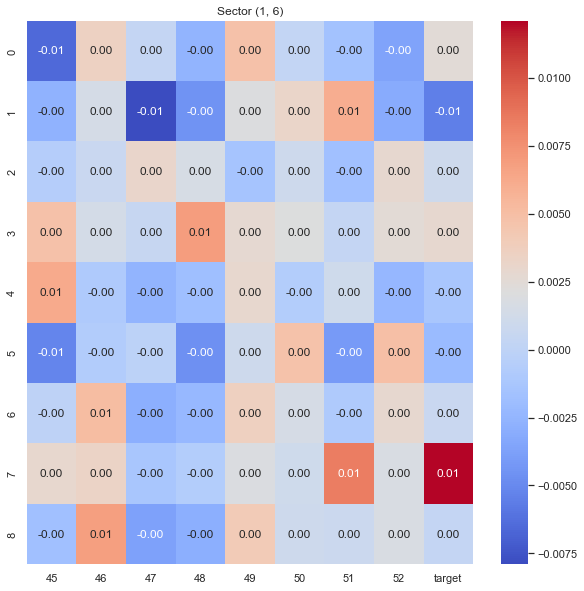

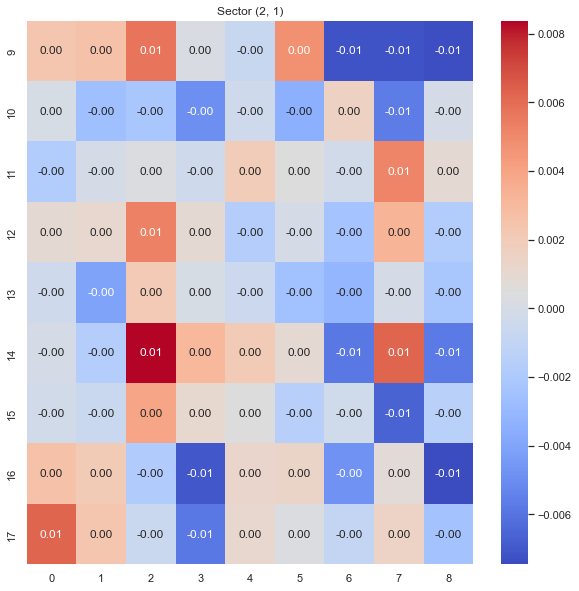

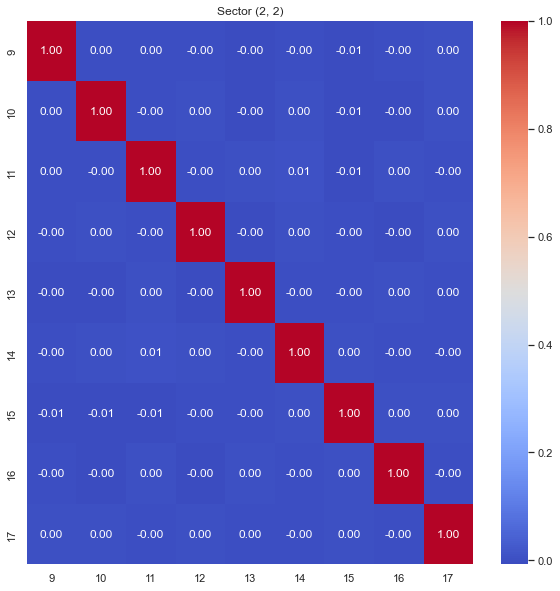

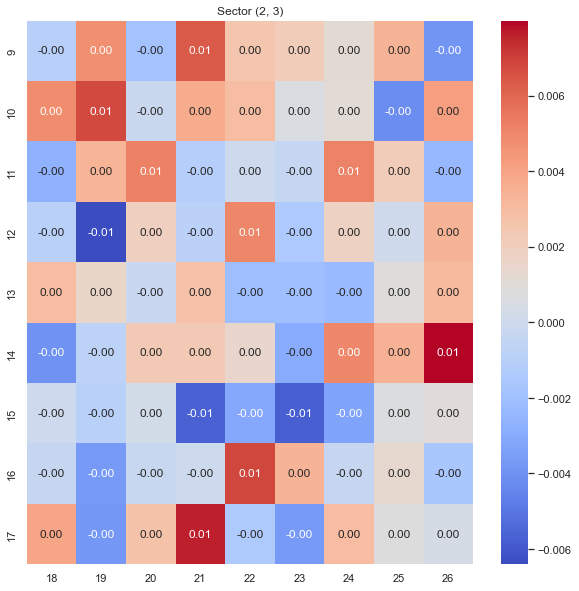

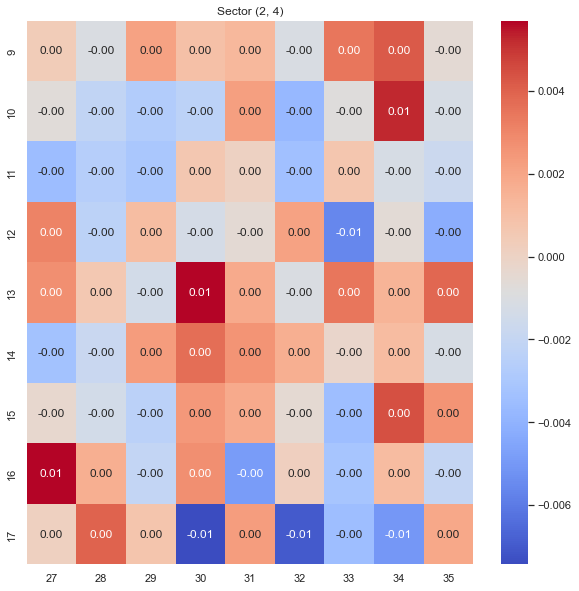

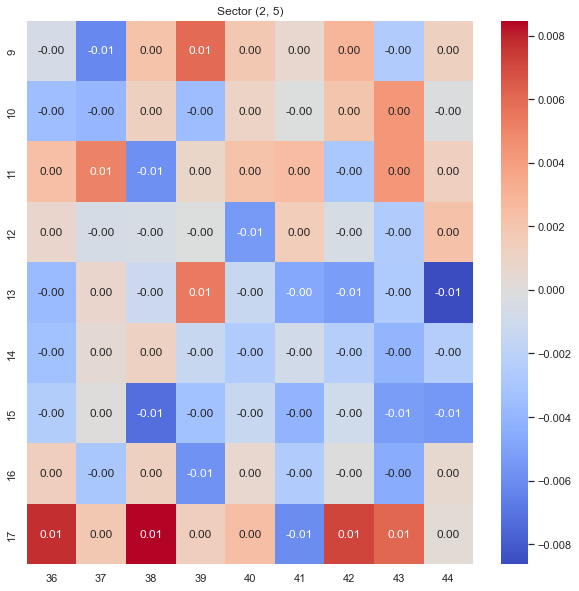

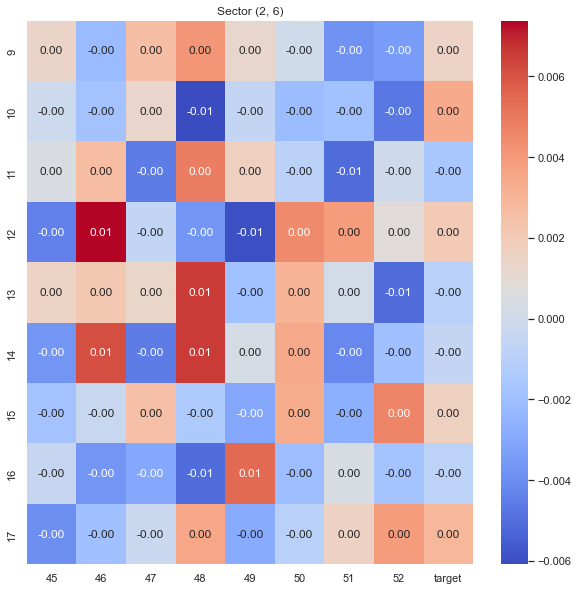

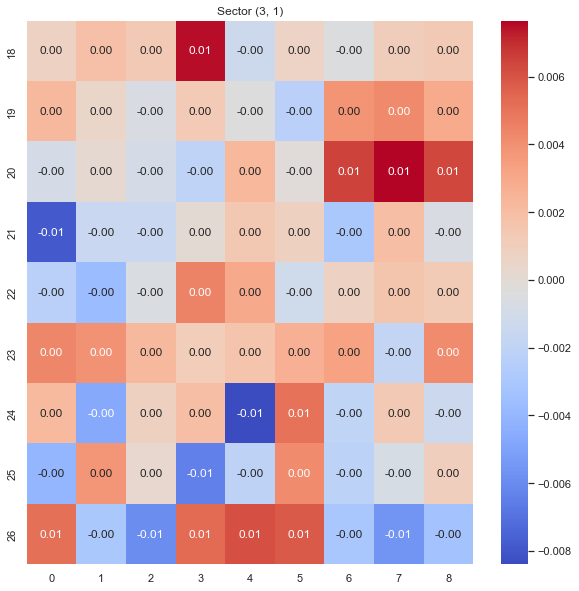

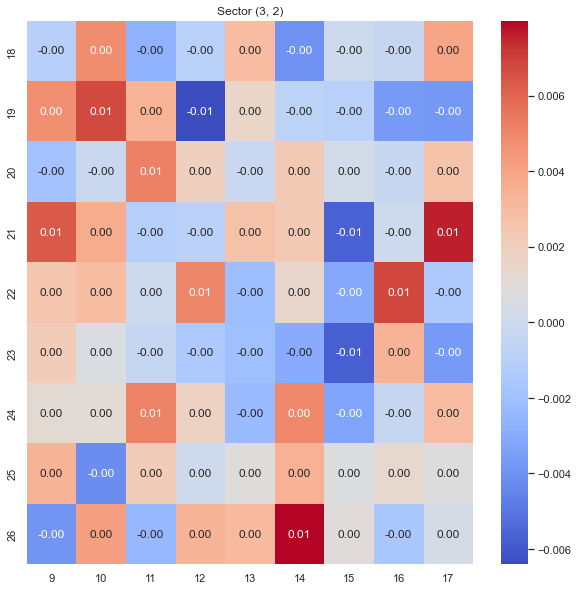

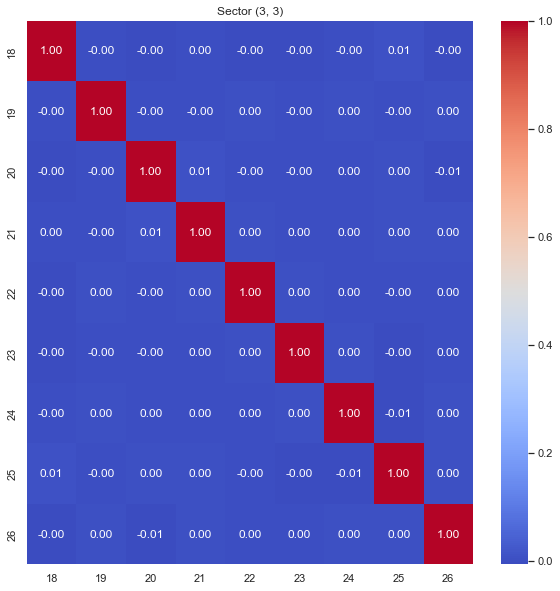

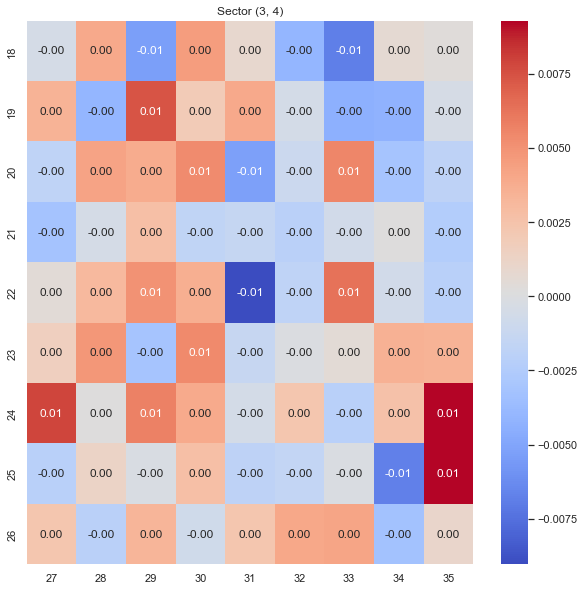

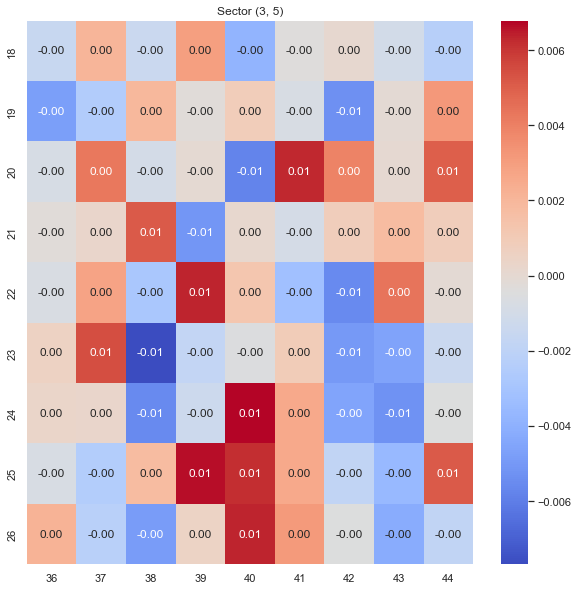

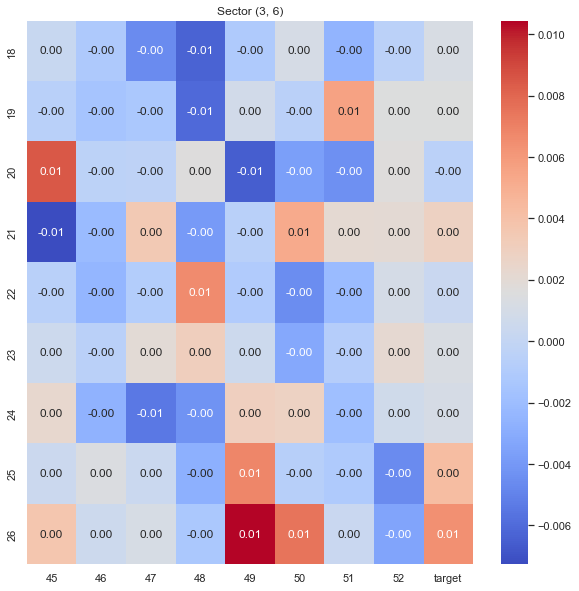

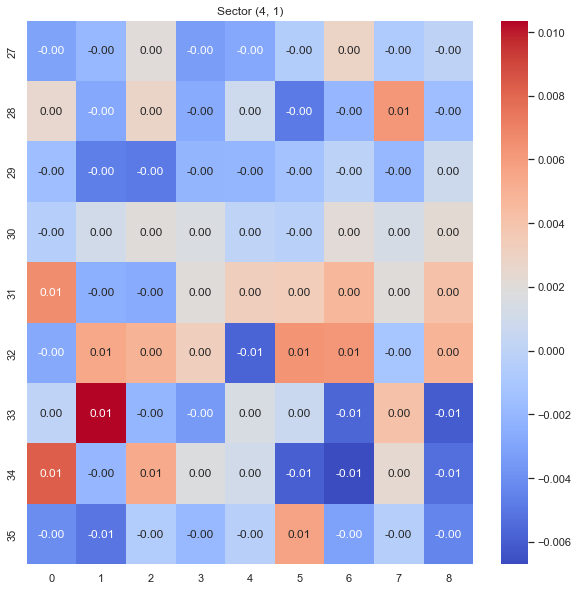

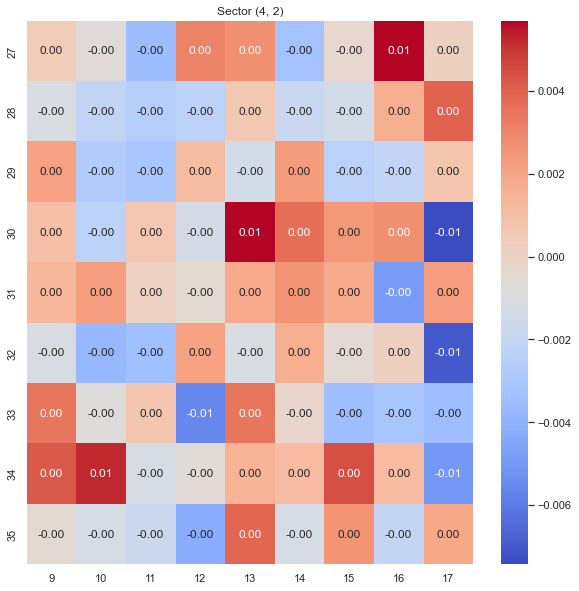

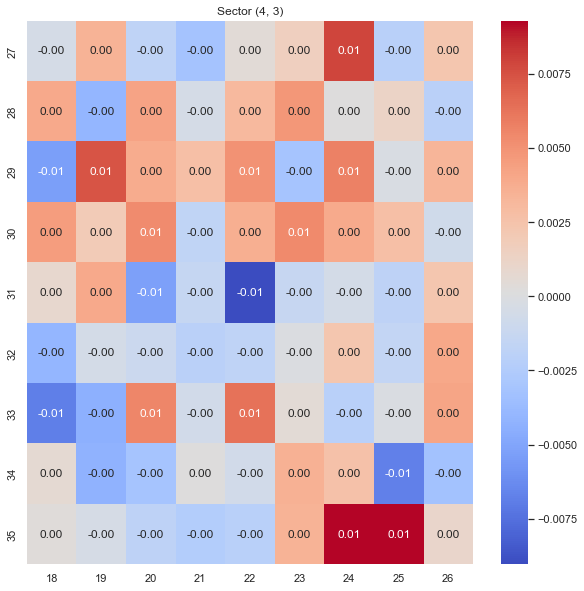

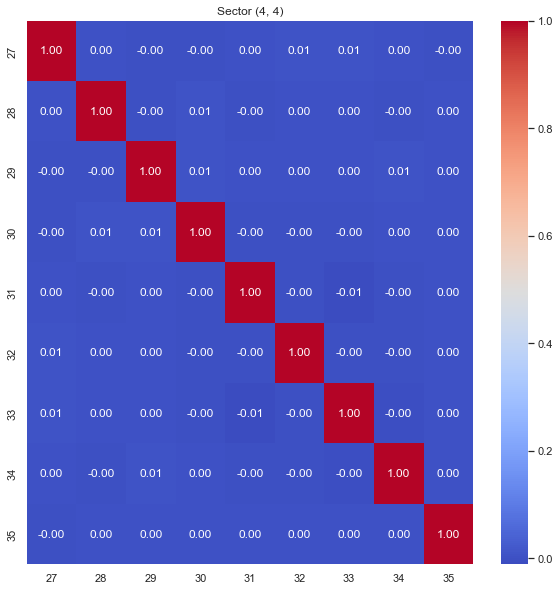

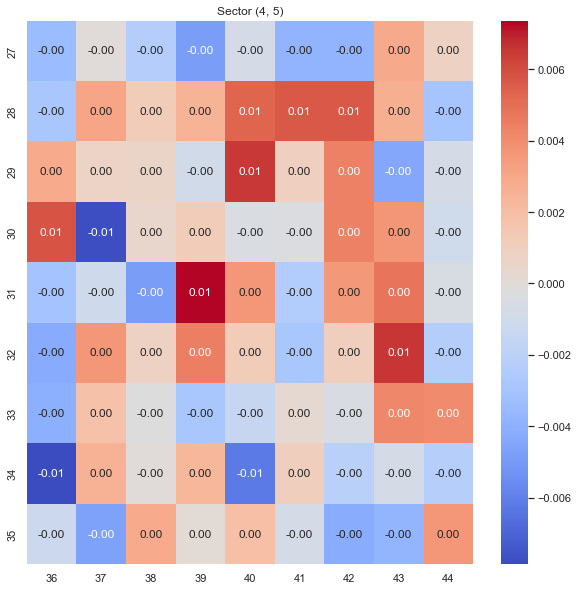

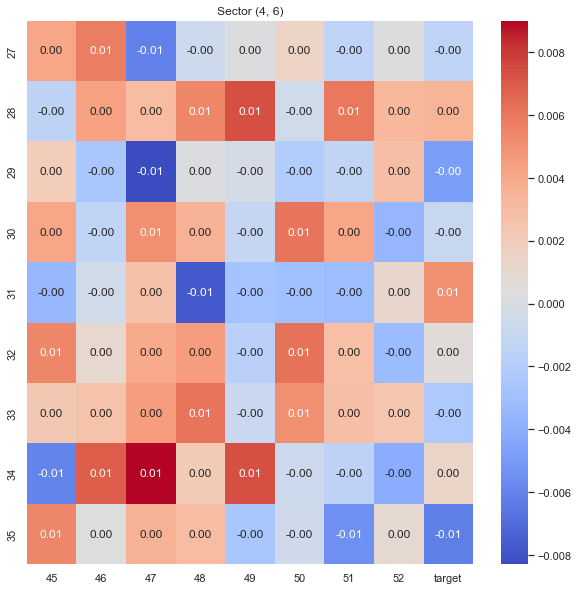

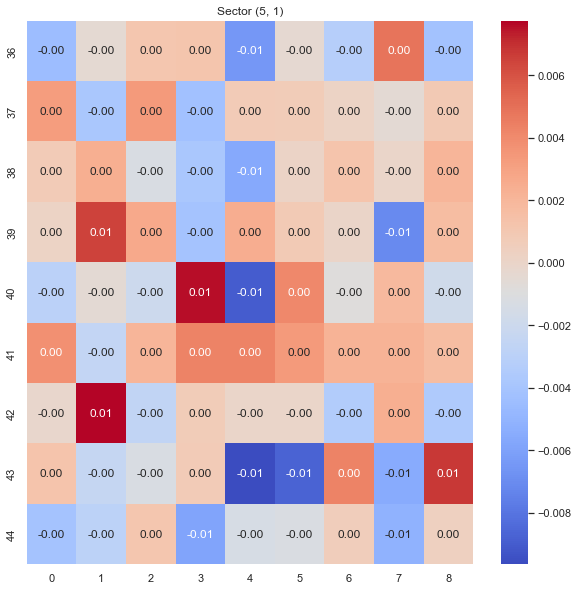

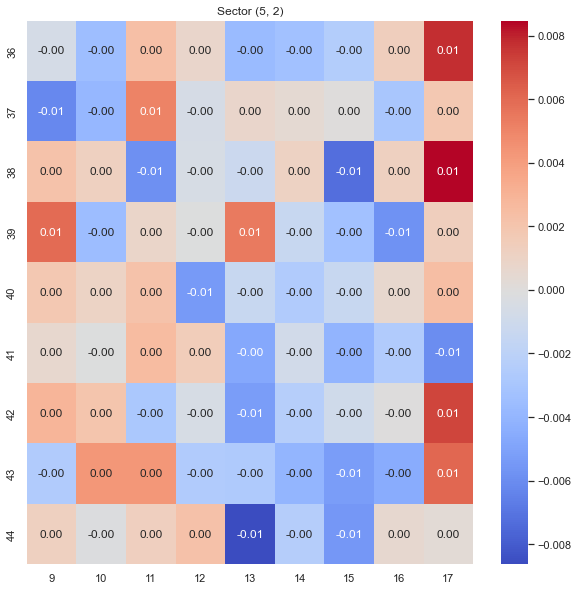

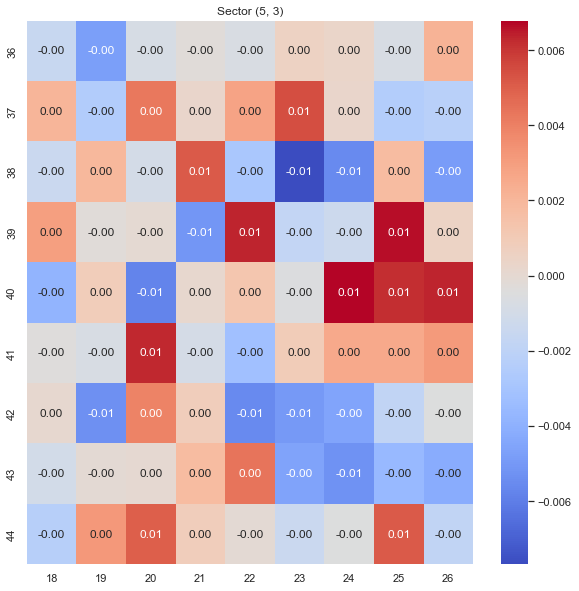

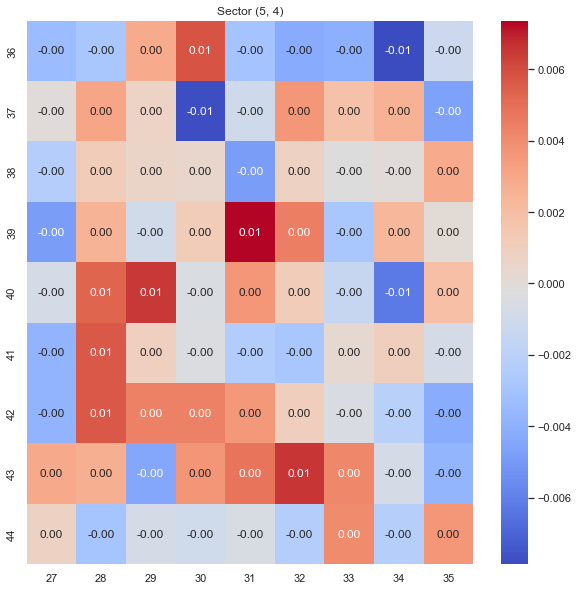

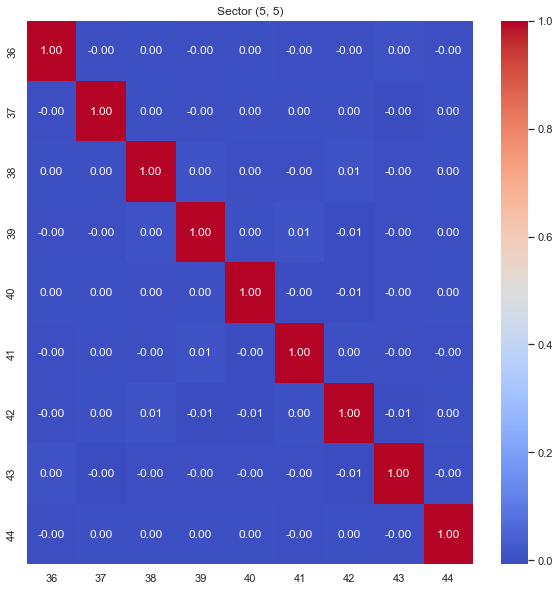

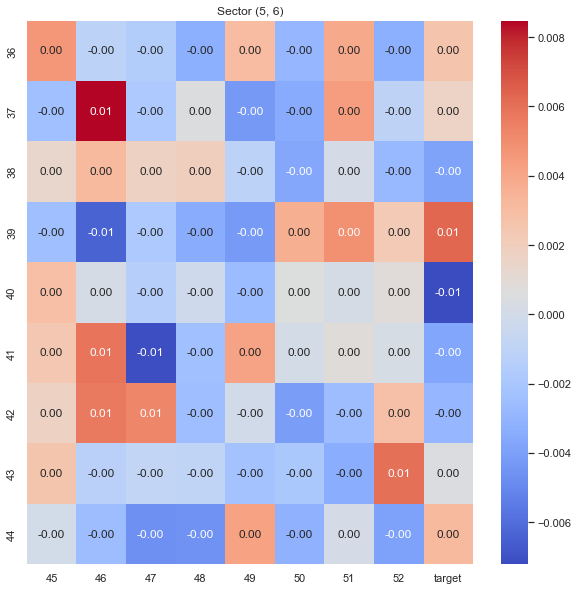

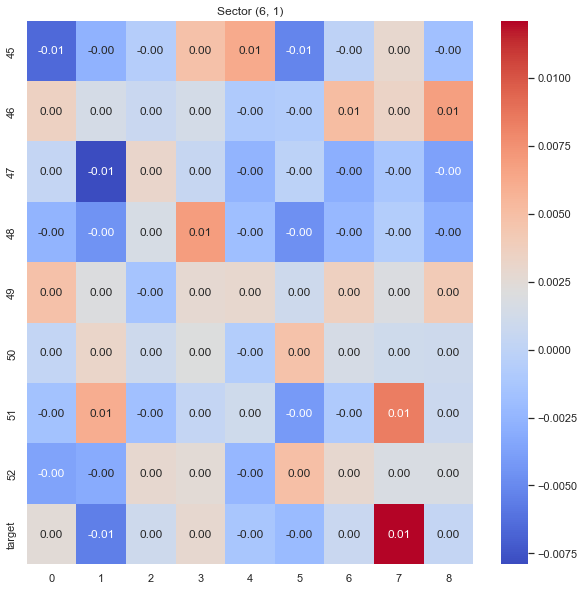

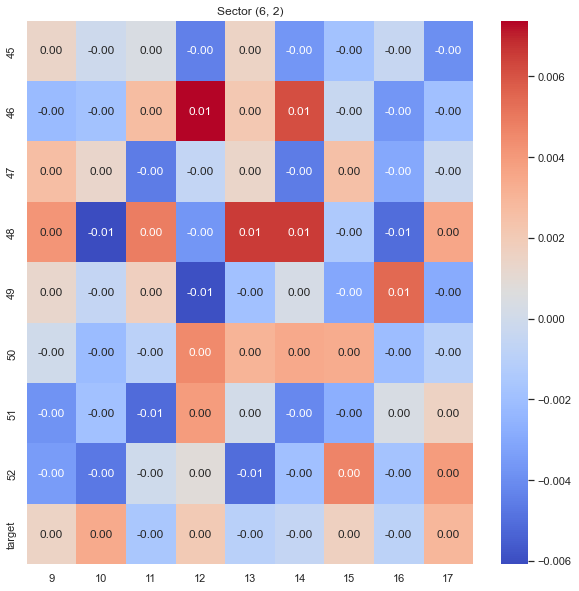

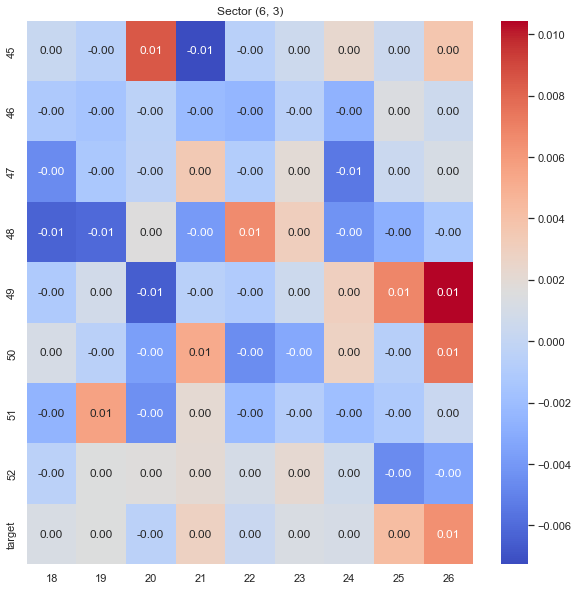

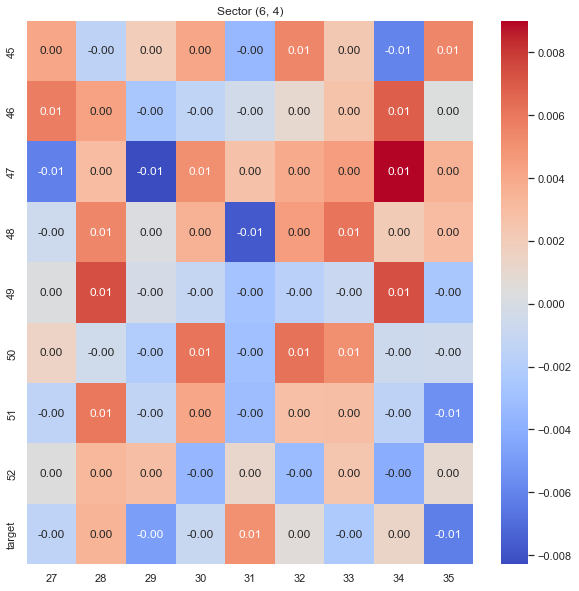

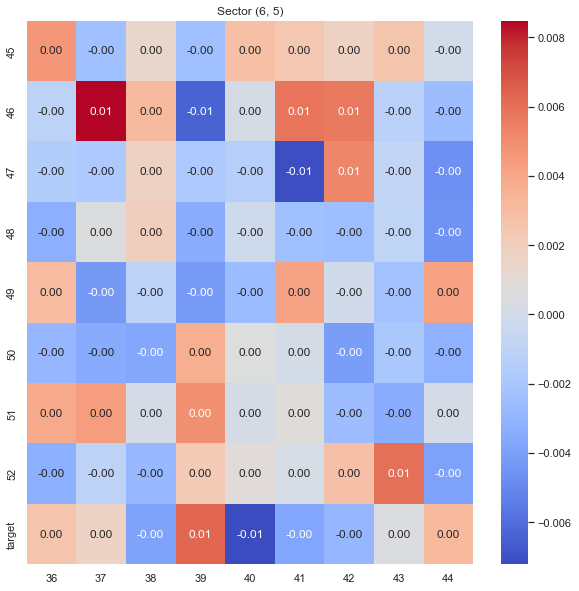

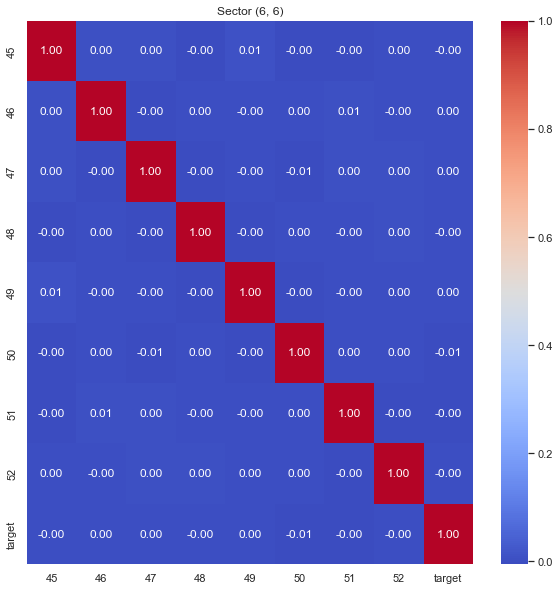

In [12]:
sector_size = nrows // 6 
for i in range(0, nrows, sector_size):
    for j in range(0, ncols, sector_size):
        # Extract sector
        sector = correlation_matrix.iloc[i:i+sector_size, j:j+sector_size]

        # Plot sector
        plt.figure(figsize=(10, 10))
        sns.heatmap(sector, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f"Sector ({i//sector_size+1}, {j//sector_size+1})")
        plt.show()

Text(0.5, 1.0, 'Correlation with the target')

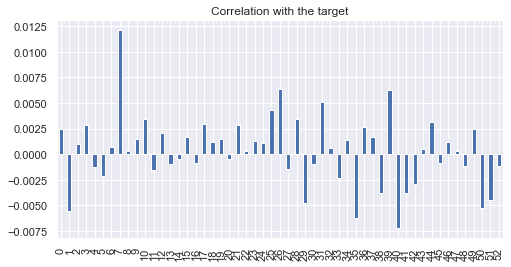

In [31]:
correlations = correlation_matrix.iloc[:-1, -1]  # Excludes the last row which is self-correlation

# Plot
plt.figure(figsize=(8, 4))
correlations.plot(kind='bar')
plt.title('Correlation with the target')

In [14]:
chunks = [df_train.columns[i:i + 6] for i in range(0, n, 6)]
chunks

[Index(['0', '1', '2', '3', '4', '5'], dtype='object'),
 Index(['6', '7', '8', '9', '10', '11'], dtype='object'),
 Index(['12', '13', '14', '15', '16', '17'], dtype='object'),
 Index(['18', '19', '20', '21', '22', '23'], dtype='object'),
 Index(['24', '25', '26', '27', '28', '29'], dtype='object'),
 Index(['30', '31', '32', '33', '34', '35'], dtype='object'),
 Index(['36', '37', '38', '39', '40', '41'], dtype='object'),
 Index(['42', '43', '44', '45', '46', '47'], dtype='object'),
 Index(['48', '49', '50', '51', '52', 'target'], dtype='object')]

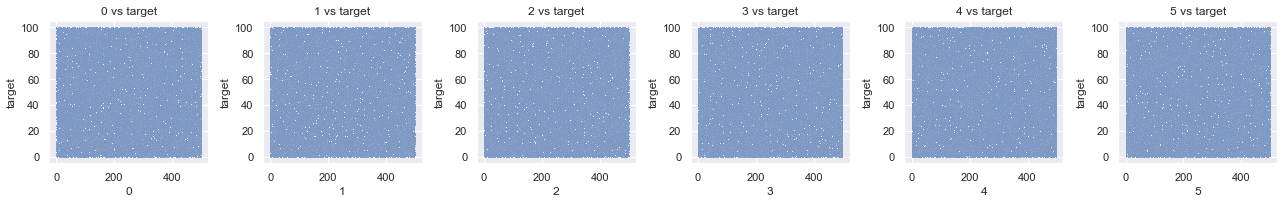

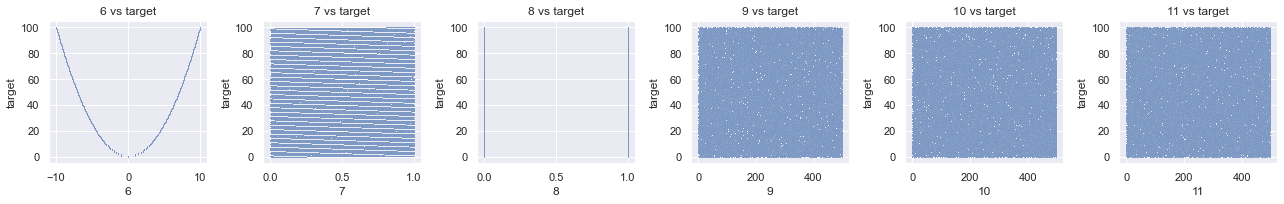

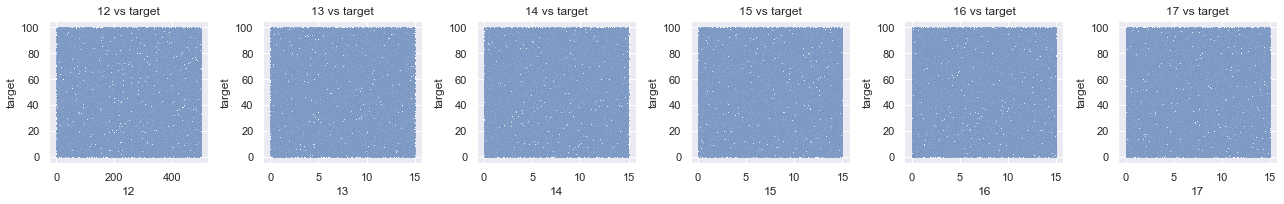

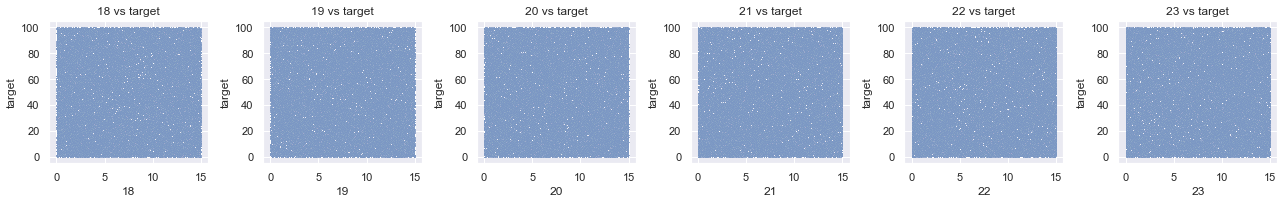

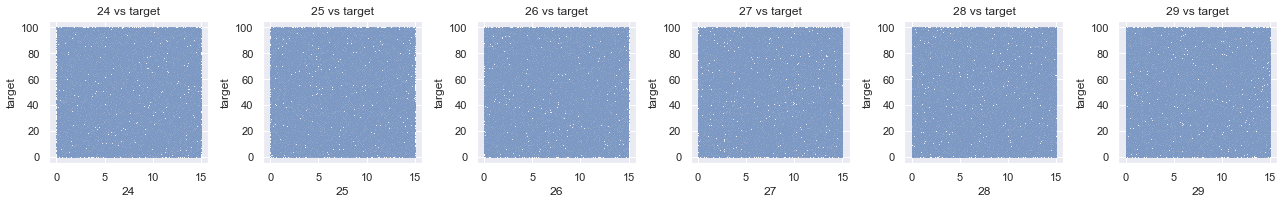

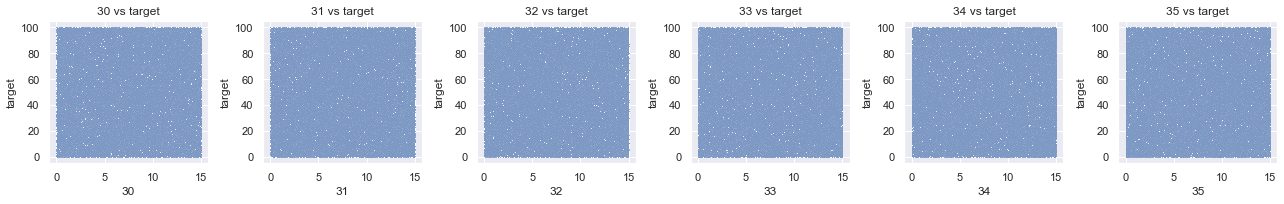

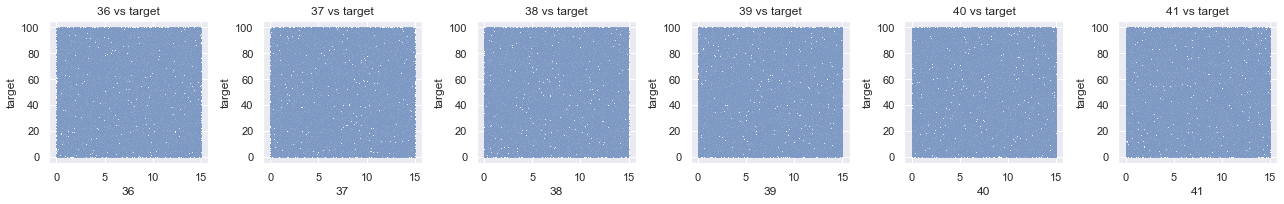

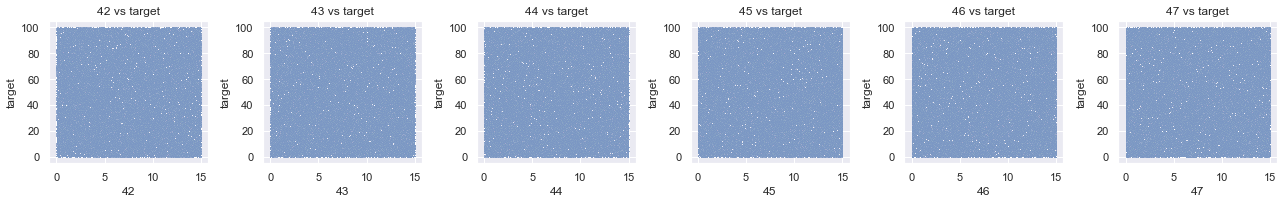

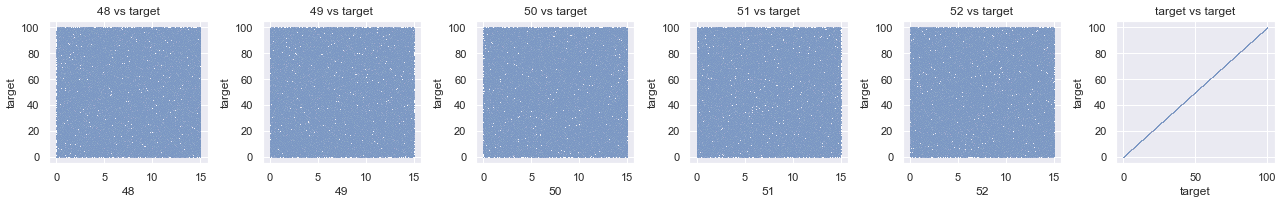

In [15]:
for i, ch1 in enumerate(chunks):
        j, ch2 = 8, ['target']
    #for j, ch2 in enumerate(chunks):
        #if j>i:
        n_cols = len(ch1)
        fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(18,3))

        for ii, col1 in enumerate(ch1):
            for jj, col2 in enumerate(ch2):
                #if jj>ii:
                ax = axes[ii]
                sns.scatterplot(x=df_train[col1], y=df_train[col2], ax=ax, s=1)

                ax.set_title(f'{col1} vs {col2}')

        plt.tight_layout()
        plt.show()
        
        #break
    #break


In [16]:
df_test.head()

0    1    2    3    4    5         6         7  8    9  ...         43  \
0  259  388  402  340  156  382  3.316625  0.218760  1  164  ...   7.163474   
1  441  192  381  421  452  123 -8.888194  0.700228  0  349  ...  10.619064   
2   83  129  107  156  247  191  2.645751  0.494556  1  297  ...   1.819890   
3  183  438  191  116  491  403 -6.164414  0.511117  0  272  ...   4.168135   
4  449  156  310  188  279  465  8.000000  0.756416  1   90  ...   7.908122   

          44         45        46         47         48         49         50  \
0  10.227235   0.889111  9.190222   4.670908   0.931525   7.634177   0.158196   
1   9.339161   4.221861  0.595563  13.865748   0.328453  11.507599   9.107966   
2  10.670237  10.350867  5.134417   5.898995   8.374986   4.638049   3.160023   
3  12.782579   0.513072  0.321295  11.334062  11.735511   1.911520   8.365676   
4   1.140498  14.165074  7.688796   5.079241   8.152186   1.680403  13.215111   

          51         52  
0  13.432551   2.511191  
1   1.302407  11.105604  
2   2.243799   5.073030  
3   4.877288  11.601819  
4   5.823109   1.038015  

[5 rows x 53 columns]

In [17]:
df_test.describe()

0             1             2             3             4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     248.387400    250.191800    248.064900    249.992200    251.642200   
std      144.124521    144.850399    144.792255    144.015371    144.745324   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      123.000000    123.000000    123.000000    128.000000    125.000000   
50%      249.000000    251.000000    246.000000    252.000000    252.000000   
75%      373.000000    377.000000    375.000000    373.000000    379.000000   
max      499.000000    499.000000    499.000000    499.000000    499.000000   

                  5             6             7             8             9  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     249.678600     -0.079268      0.505215      0.492200    245.823600   
std      144.677689      7.032273      0.285678      0.499964    142.852057   
min        0.000000     -9.949874      0.000260      0.000000      0.000000   
25%      124.000000     -7.071068      0.261199      0.000000    122.000000   
50%      249.000000     -1.000000      0.507519      0.000000    244.000000   
75%      374.000000      7.071068      0.750603      1.000000    368.000000   
max      499.000000      9.949874      0.999982      1.000000    499.000000   

       ...            43            44            45            46  \
count  ...  10000.000000  10000.000000  10000.000000  10000.000000   
mean   ...      7.422179      7.488576      7.526853      7.449717   
std    ...      4.335234      4.321760      4.340501      4.328863   
min    ...      0.000310      0.001103      0.000545      0.001244   
25%    ...      3.707353      3.758763      3.762664      3.711092   
50%    ...      7.371637      7.531310      7.550432      7.361451   
75%    ...     11.147130     11.193657     11.311366     11.201442   
max    ...     14.997599     14.999511     14.999954     14.998273   

                 47            48            49            50            51  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       7.438931      7.563141      7.510016      7.465383      7.503378   
std        4.308985      4.347630      4.353635      4.363206      4.338020   
min        0.000026      0.001580      0.000286      0.001716      0.000834   
25%        3.753059      3.805891      3.734299      3.696070      3.758126   
50%        7.377399      7.627437      7.547184      7.441250      7.500340   
75%       11.154313     11.338666     11.276399     11.297861     11.268075   
max       14.998069     14.999790     14.999314     14.999992     14.998473   

                 52  
count  10000.000000  
mean       7.503662  
std        4.291431  
min        0.000132  
25%        3.810301  
50%        7.429109  
75%       11.209570  
max       14.997318  

[8 rows x 53 columns]

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  int64  
 1   1       10000 non-null  int64  
 2   2       10000 non-null  int64  
 3   3       10000 non-null  int64  
 4   4       10000 non-null  int64  
 5   5       10000 non-null  int64  
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  int64  
 9   9       10000 non-null  int64  
 10  10      10000 non-null  int64  
 11  11      10000 non-null  int64  
 12  12      10000 non-null  int64  
 13  13      10000 non-null  float64
 14  14      10000 non-null  float64
 15  15      10000 non-null  float64
 16  16      10000 non-null  float64
 17  17      10000 non-null  float64
 18  18      10000 non-null  float64
 19  19      10000 non-null  float64
 20  20      10000 non-null  float64
 21  21      10000 non-null  float64
 22 

In [19]:
X = df_train.iloc[:, :-1]  
y = df_train.iloc[:, -1]

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
rf_regressor = RandomForestRegressor(random_state=42,n_estimators=10,max_depth=10,min_samples_split=4, min_samples_leaf=2,n_jobs=-1)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=10, n_jobs=-1, random_state=42)

In [22]:
from sklearn.metrics import mean_squared_error

y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.14220061587555882


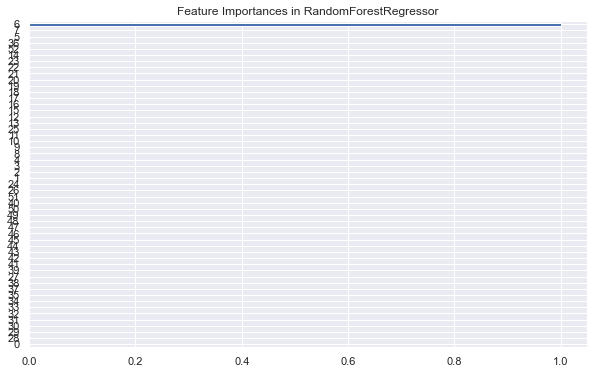

In [23]:
importances = rf_regressor.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names)

feature_importances_sorted = feature_importances.sort_values()
feature_importances_sorted.plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances in RandomForestRegressor')
plt.show()

In [24]:
feature_importances[feature_importances>0.000001]

6    0.999929
7    0.000071
dtype: float64

<Axes: xlabel='target'>

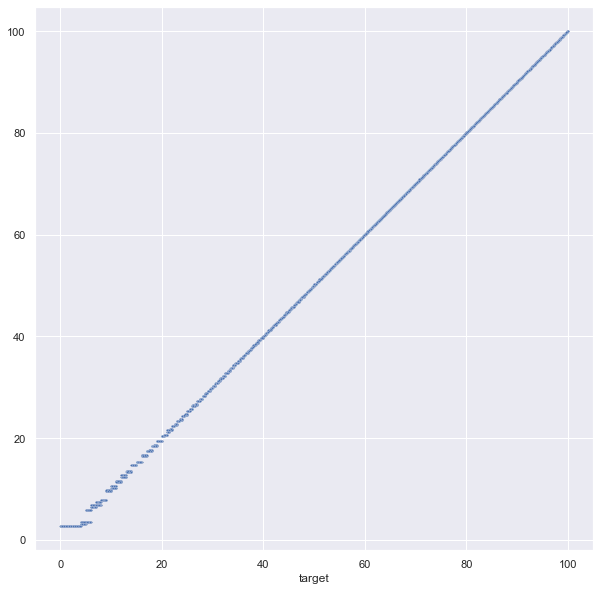

In [25]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred,s=3)

In [42]:
X = df_train.loc[:, ['6','7']]  
y = df_train.iloc[:, -1]

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline

degree = 2  # You can change this value based on your needs

pipeline = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=degree)),
    ("regression", LinearRegression())
])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 9.64448660774783e-28


<Axes: xlabel='target'>

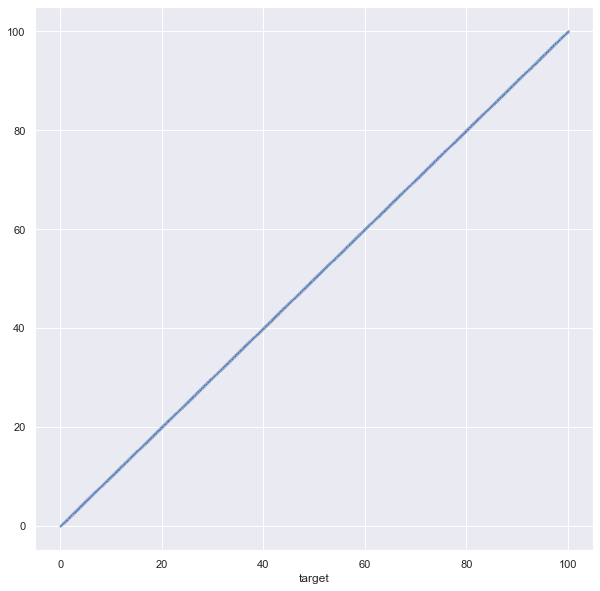

In [46]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred,s=3)